In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/raw/master/Canada.xlsx", sheet_name="Canada by Citizenship", skiprows=range(20))

In [ ]:
df_can.drop(["Coverage","Type","AREA","REG","DEV"], axis=1, inplace=True)

In [ ]:
df_can.rename(columns={"OdName":"Country","AreaName":"Continent","RegName":"Region"}, inplace=True)

In [ ]:
Index_By_County = df_can.set_index("Country")

In [ ]:
Index_By_County

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [ ]:
Index_By_County ["Total"] = Index_By_County.sum(axis=1)
years=range(1980,2014)
df_dsn=Index_By_County.loc[['Denmark','Sweden','Norway'],years]
df_dsn["Total"] = df_dsn.sum(axis=1)
df_dsn.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,3901
Sweden,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,5866
Norway,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,2327


In [ ]:
Total_for_dsn = sum(df_dsn["Total"])

In [ ]:
Cp = [(float(value)/ Total_for_dsn) for value  in df_dsn["Total"]]
for idx, porsion in enumerate(Cp):
  print (df_dsn.index.values[idx],porsion)

Denmark 0.32255663965602777
Sweden 0.48503390110798744
Norway 0.1924094592359848


In [ ]:
Total_for_dsn

12094

In [ ]:
Cp = []
for value in df_dsn["Total"]:
  porsion = value/Total_for_dsn
  Cp.append(porsion)

In [ ]:
# 50 x 10
width, height = (50,10)

In [ ]:
total_titles = width * height
total_titles

500

In [ ]:
titles_per_country = [round(propor * total_titles) for propor in Cp]
titles_per_country

[161, 243, 96]

In [ ]:
nilai = [2,3,4,5,6]

In [ ]:
kuadrat_nilai = [(n ** 2) for n in nilai]
kuadrat_nilai

[4, 9, 16, 25, 36]

In [ ]:
title_index = 0
country_index = 0
wafle = np.zeros((width,height ))
for col in range(width):
  for row in range(height):
    title_index += 1
    if title_index > sum(titles_per_country[0:country_index]):
        country_index +=1

    wafle[col, height - (row+1)] = country_index

wafle

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 

<function matplotlib.pyplot.colorbar>

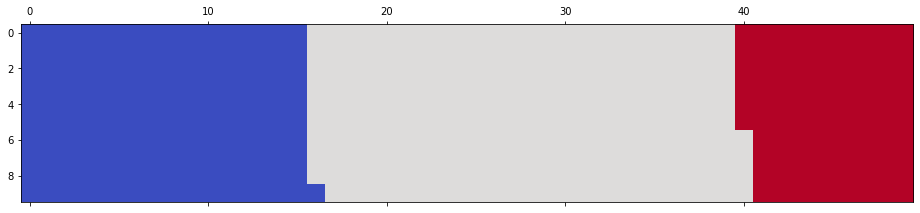

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure
colormap = plt.cm.coolwarm
wafle = wafle.transpose()
plt.matshow(wafle, cmap = colormap)
plt.colorbar

In [ ]:
mac = 6 
mylist = []

for i in range(0,6):
  mylist.append(mac-(i+1))
mylist

[5, 4, 3, 2, 1, 0]

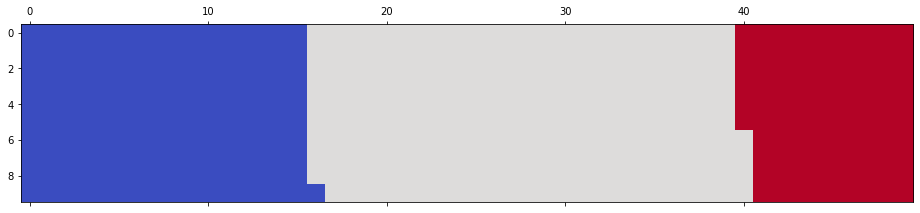

In [ ]:
fig = plt.figure
colormap = plt.cm.coolwarm
plt.matshow(wafle, cmap = colormap)
ax = plt.gca()

([], <a list of 0 Text major ticklabel objects>)

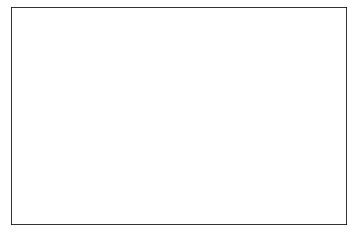

In [ ]:
ax.set_xticks(np.arange(-.5,width,1),minor=True)
ax.set_yticks(np.arange(-.5,height,1),minor=True)
ax.grid(which="minor",color="w", linestyle="-",linewidth=2)
plt.yticks([])
plt.xticks([])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt'
r = requests.get(url, allow_redirects=True)
open('alice.txt', 'wb').write(r.content)

145192

In [ ]:
alice_novel = open('./alice.txt','r').read()
stopwords = set (STOPWORDS)

alice_word_count_generator = WordCloud(
    background_color = 'white',
    max_words = 1000,
    stopwords = stopwords
)
alice_novel
alice_word_count_generator.generate(alice_novel)
alice_word_count_generator

NameError: ignored

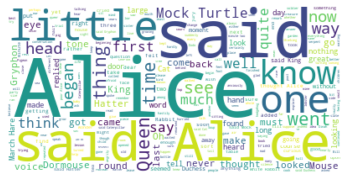

In [ ]:
plt.imshow(alice_word_count_generator, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df_total_year = pd.Dataframe(data_years)